## TIMELINE ANALYSIS
### Author-MohanaSahithiP

Create a storyboard showing spread of Covid-19 cases 

Dataset: Daily updated .csv file on https://bit.ly/30d2gdi

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display
from datetime import datetime as d
from ipywidgets import interact,interactive,fixed,interact_manual
import ipywidgets as widgets
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
from plotly.subplots import make_subplots
import dateutil
import plotly.express as px
import plotly.io as pio
import datetime
from statistics import mean 
import datetime as dt
import requests
from itertools import chain
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from folium import plugins
import os
import sys
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
%matplotlib inline

In [7]:
full = pd.read_csv("owid-covid-data.csv")
full = full[full['new_cases'].notna()]
full_ = full.groupby("date" ,as_index=False)[['new_cases','new_deaths']].sum()
full_["Date"] = pd.to_datetime(full_['date'])
full_['Week_Number'] = full_['Date'].dt.isocalendar().week
full__ = full_.groupby("Week_Number" ,as_index=False)[['new_cases','new_deaths']].mean()

In [3]:
fig = px.bar(full_,x='date', y='new_cases', orientation='v',title = "COVID19-  daily new cases",
             labels=dict(x="Date", y="Count"))
fig.show()

In [8]:
fig = px.line(x=full__["Week_Number"], y=full__["new_cases"], title = "7-day average of daily new cases",
             labels=dict(x="Week", y="Count"))
fig.show()

In [9]:
df = pd.read_csv("owid-covid-data.csv")
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)

Number of duplicate rows:  (0, 67)


### Checking the Missing or Null values

In [12]:
print(df.isnull().sum())

iso_code                                        0
continent                                   13271
location                                        0
date                                            0
total_cases                                 13193
                                            ...  
population                                   1013
excess_mortality_cumulative_absolute       227430
excess_mortality_cumulative                227430
excess_mortality                           227379
excess_mortality_cumulative_per_million    227430
Length: 67, dtype: int64


In [13]:
df1 = df[["date", "total_cases", "new_cases", "total_deaths", "new_tests", "total_tests"]]
df1.head()

,date,total_cases,new_cases,total_deaths,new_tests,total_tests
0,2020-02-24,5.0,5.0,NaN,NaN,NaN
1,2020-02-25,5.0,0.0,NaN,NaN,NaN
2,2020-02-26,5.0,0.0,NaN,NaN,NaN
3,2020-02-27,5.0,0.0,NaN,NaN,NaN
4,2020-02-28,5.0,0.0,NaN,NaN,NaN


In [14]:
df1.date = pd.to_datetime(df.date)
df1.set_index('date', inplace = True)
df1.head()
df1.tail()

,total_cases,new_cases,total_deaths,new_tests,total_tests
date,,,,,
2022-11-11,257893.0,0.0,5606.0,NaN,NaN
2022-11-12,257893.0,0.0,5606.0,NaN,NaN
2022-11-13,257893.0,0.0,5606.0,NaN,NaN
2022-11-14,257893.0,0.0,5606.0,NaN,NaN
2022-11-15,257893.0,0.0,5606.0,NaN,NaN


Text(0.5, 0, 'Month')

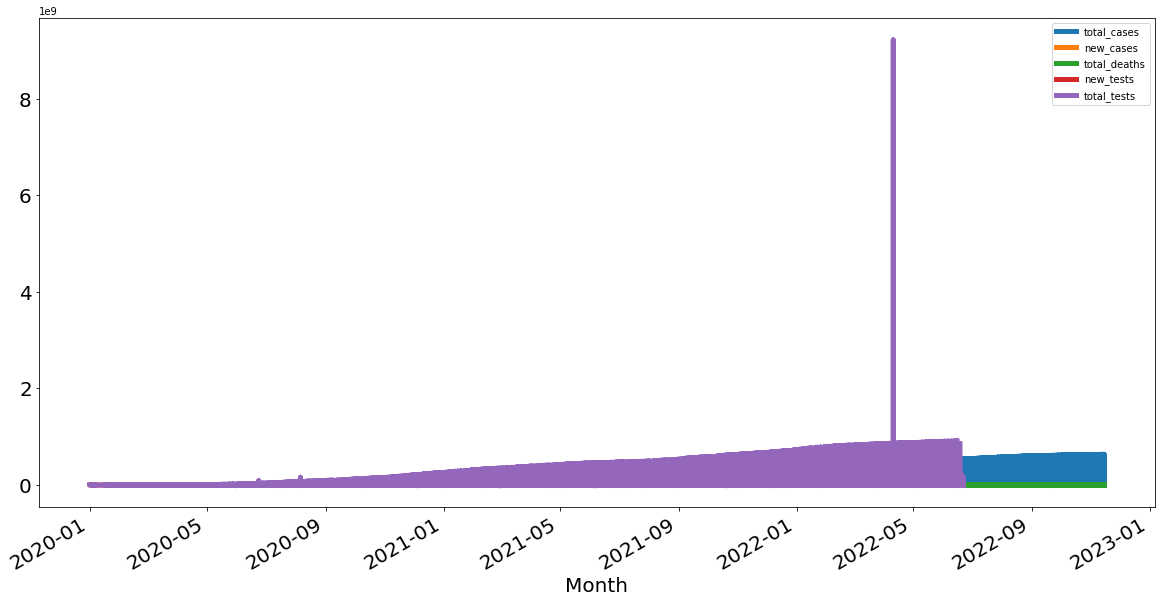

In [15]:
df1.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

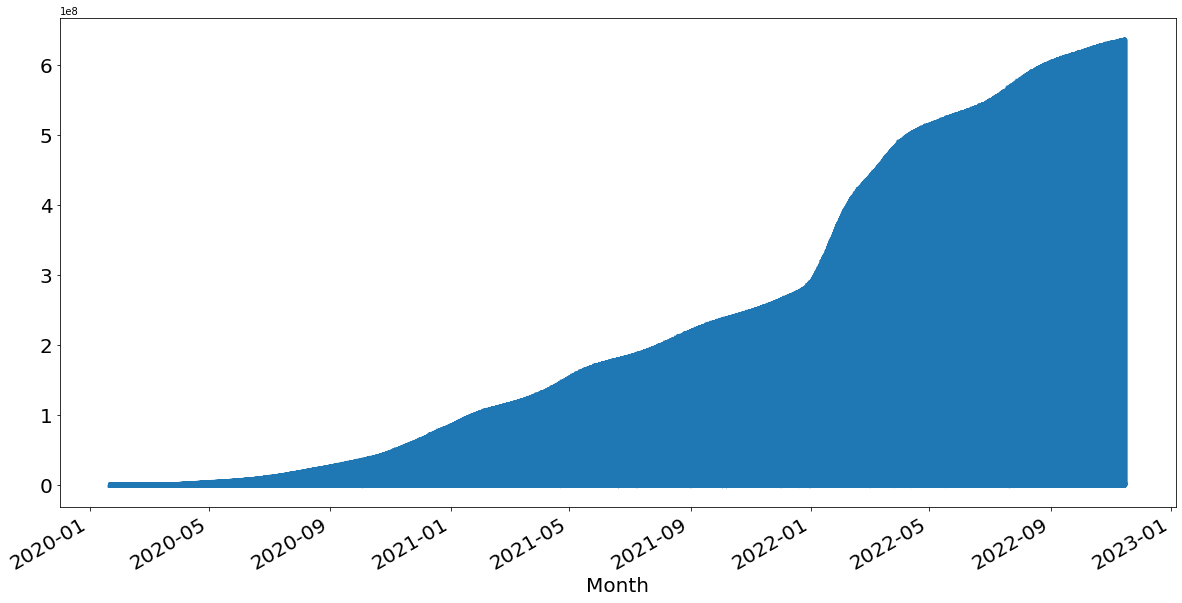

In [16]:
df1.total_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

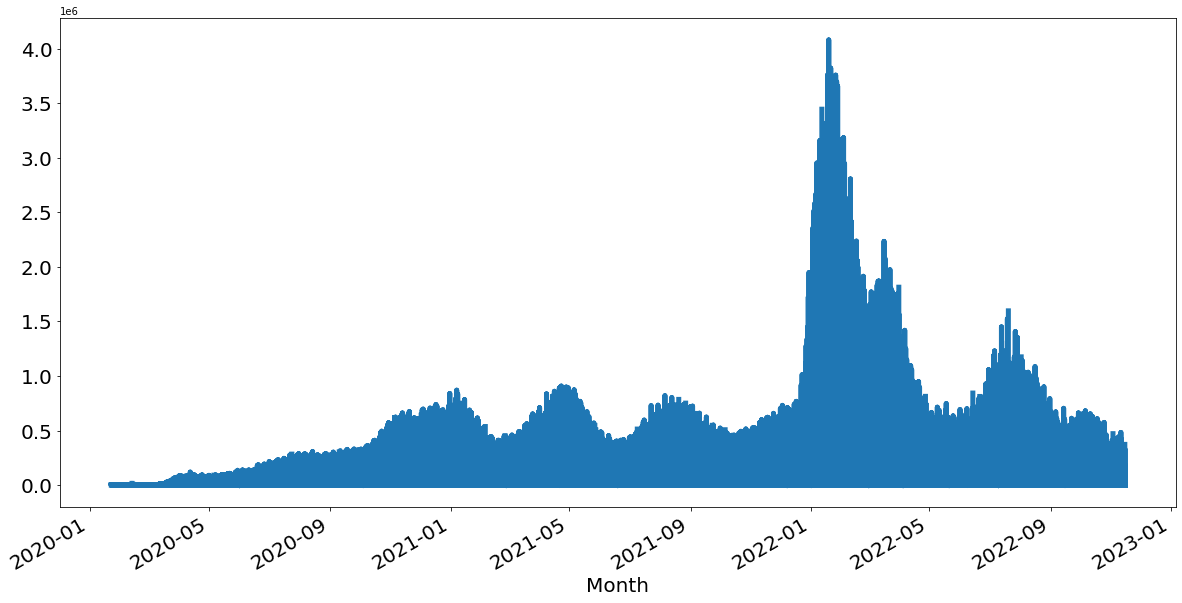

In [17]:
df1.new_cases.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

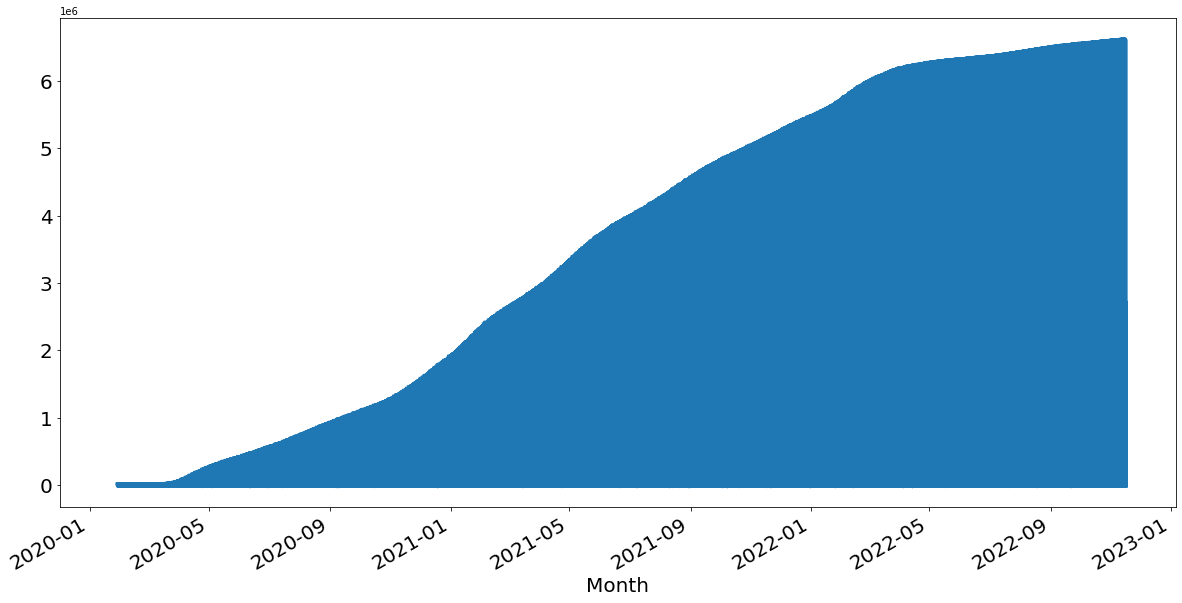

In [18]:
df1.total_deaths.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

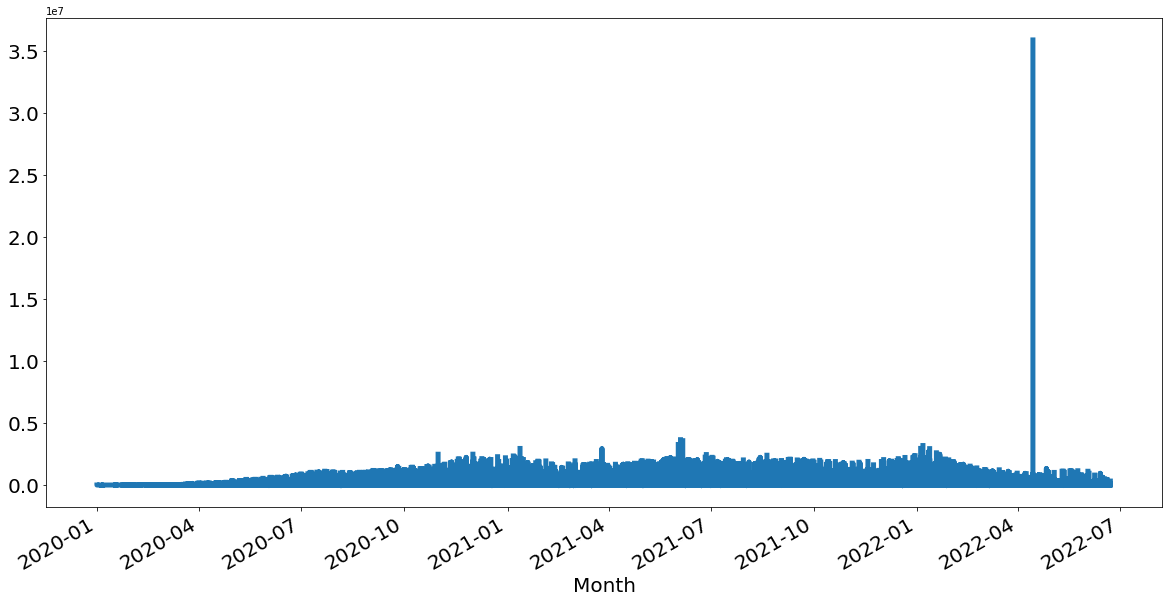

In [19]:
df1.new_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

Text(0.5, 0, 'Month')

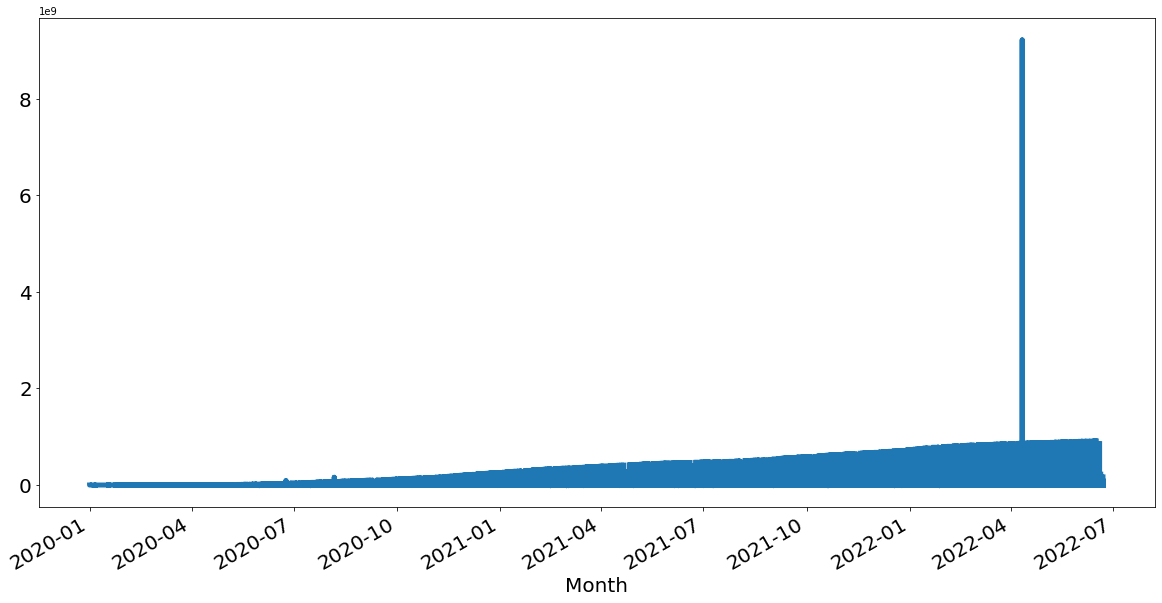

In [20]:
df1.total_tests.plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month', fontsize = 20)

### Trends and Seasonality in TimeSeries Data

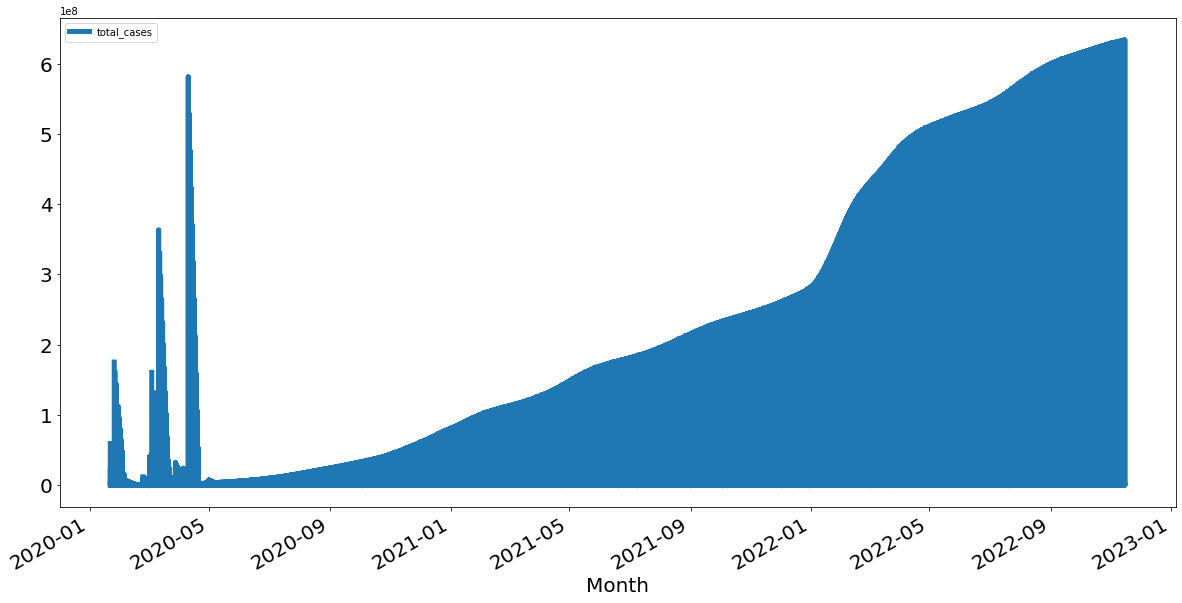

In [21]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

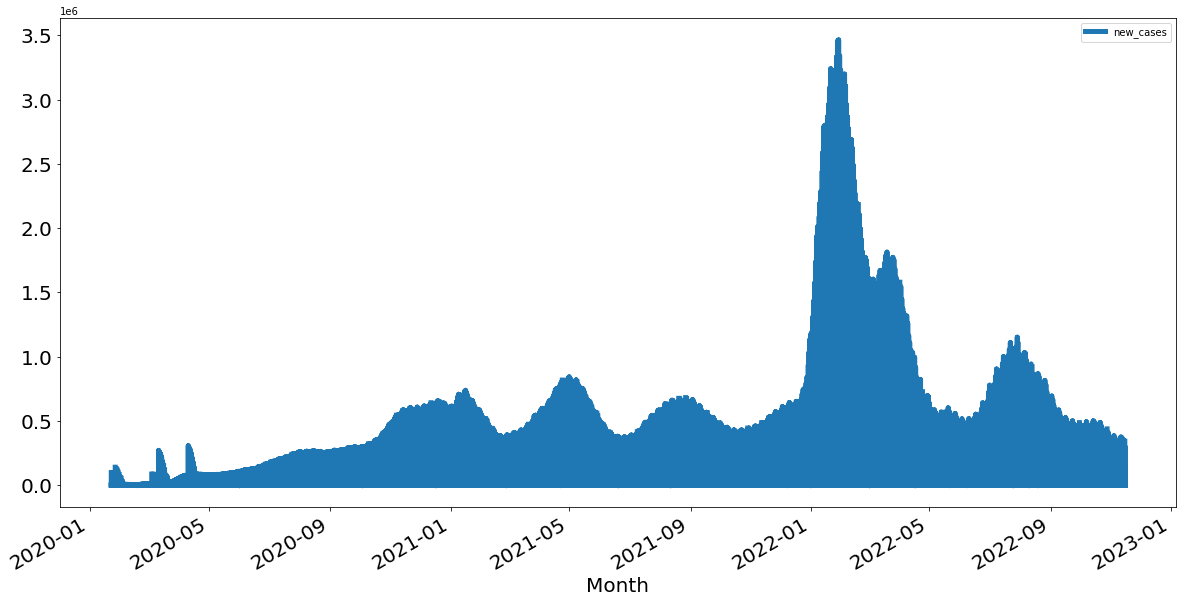

In [22]:
new_cases = df1[['new_cases']]
new_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

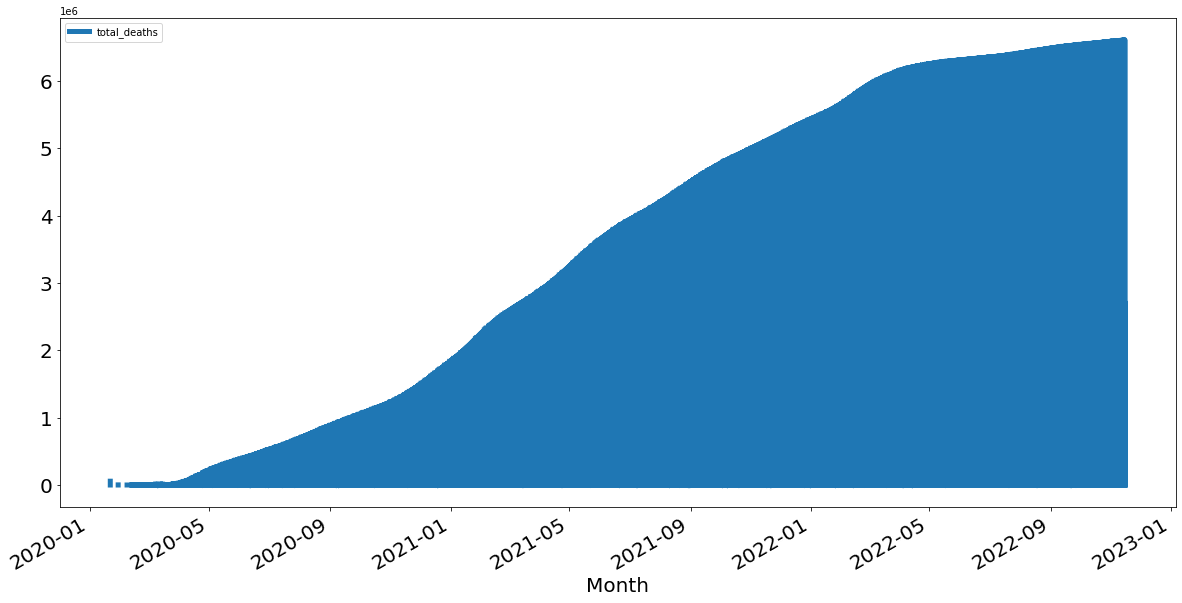

In [23]:
total_deaths = df1[['total_deaths']]
total_deaths.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

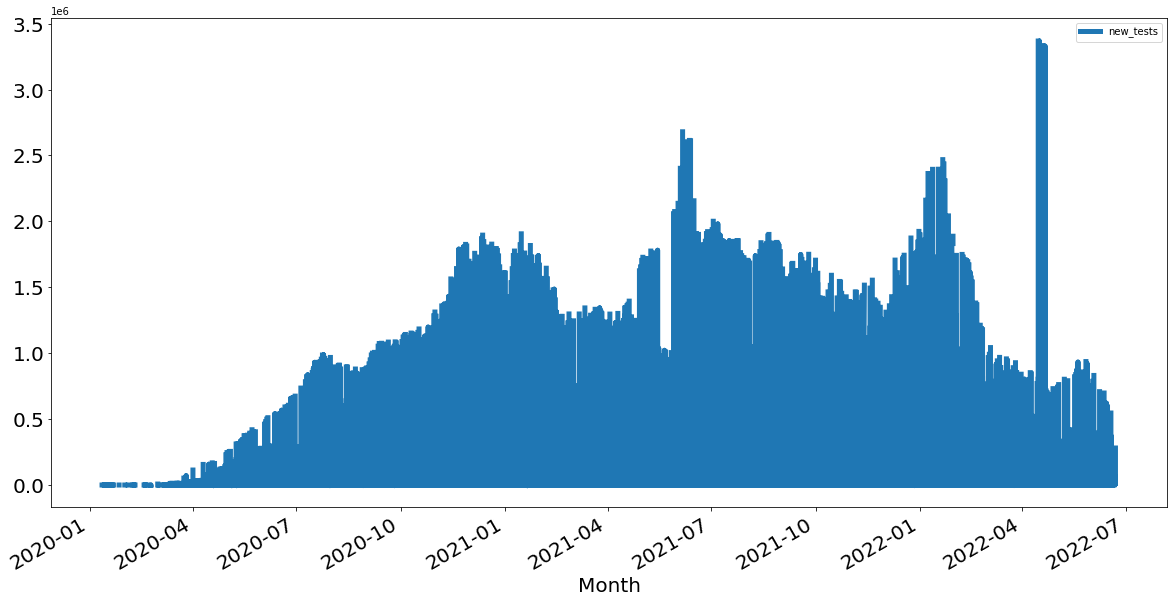

In [24]:
new_tests = df1[['new_tests']]
new_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);


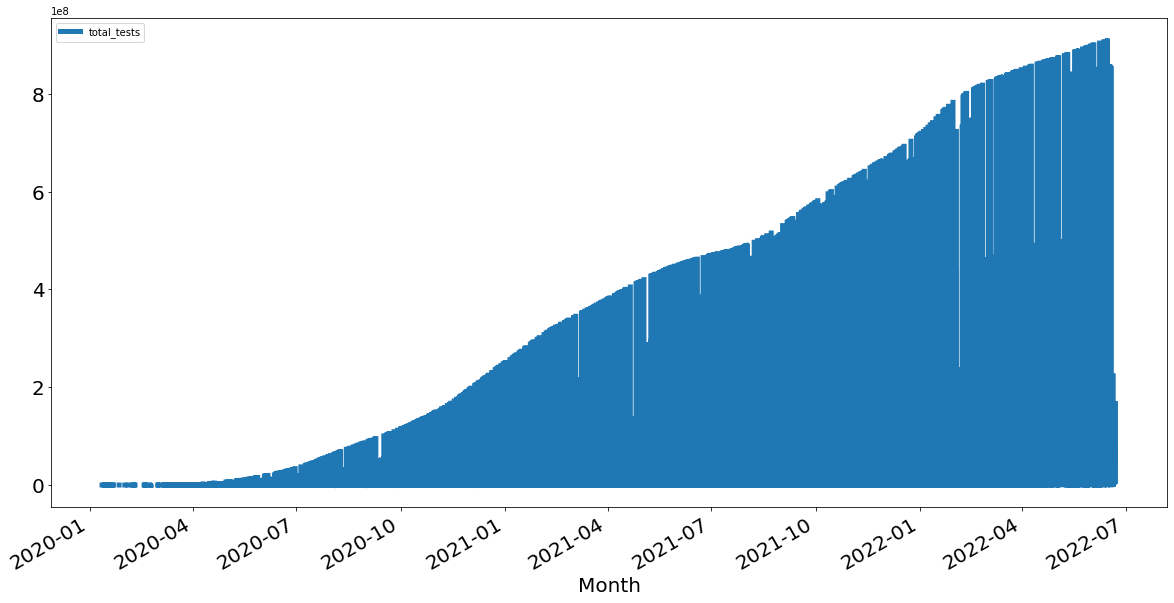

In [25]:
total_tests = df1[['total_tests']]
total_tests.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);

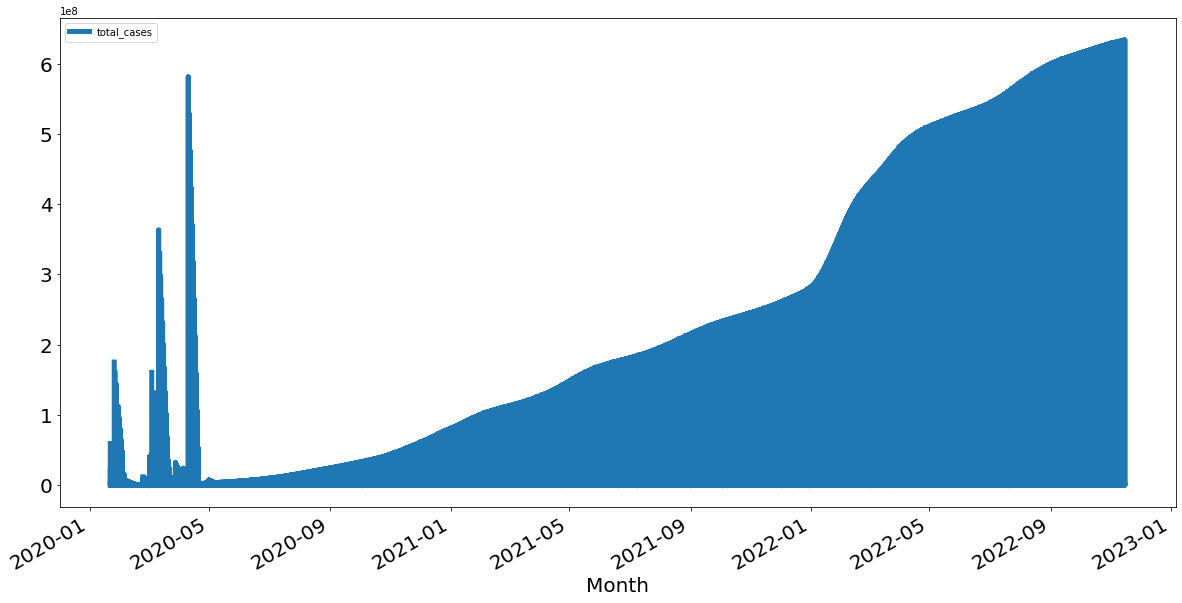

In [26]:
total_cases = df1[['total_cases']]
total_cases.rolling(12).mean().plot(figsize = (20 , 10), linewidth = 5, fontsize = 20)
plt.xlabel('Month' , fontsize = 20);